1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [8]:
from scipy import stats as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Z = 3.4661629670697414
Z score is higher than 3, so this event is not statiscally significant
Probability of more than 15 Hurricanes: 0.0008444930803583883
We conclude that it's unlikely that there'll be more than 15 hurricanes a year


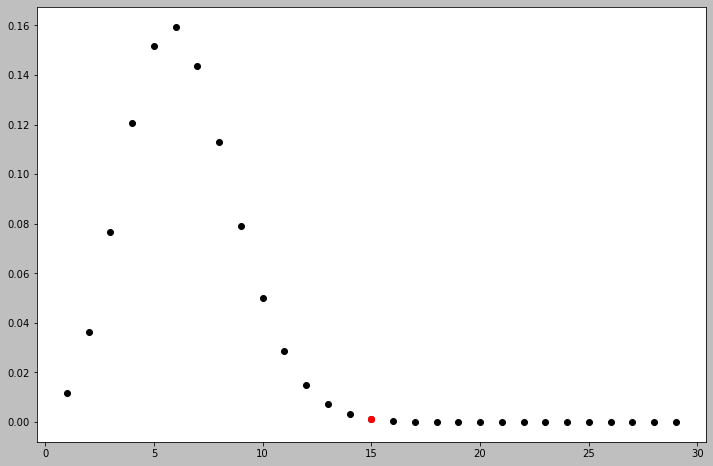

In [20]:

average=6.3
standard_deviation=np.sqrt(average)
obs_2005=15
x=np.arange(1,30)

Z = (obs_2005 - average)/standard_deviation
print('Z =', Z)
print("Z score is higher than 3, so this event is not statiscally significant")

f = sp.poisson.pmf(x, average)
g = sp.poisson.pmf(obs_2005, average)
fig,ax=plt.subplots()
fig.set_size_inches(12, 8, forward=True)
plt.scatter(x, f)
plt.scatter(obs_2005, g, color='red', marker='o')
prob = (1.-sp.poisson.cdf(obs_2005, mu=average))
print("Probability of more than 15 Hurricanes: {}".format(prob))
print("We conclude that it's unlikely that there'll be more than 15 hurricanes a year")




2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [21]:


pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])


sigma=np.sqrt((np.std(pre)**2+np.std(post)**2)/2)
T=(np.mean(pre)-np.mean(post))/(sigma*np.sqrt(2/len(pre)))

pvalue = sp.t.cdf(T,len(pre)-1)+(1.-sp.t.cdf(-T,len(pre)-1))
print(pvalue)
print("Given the above pvalue, we conclude that the change in blood pressure data provided was not statiscally significant ")


0.0031489409354536393
Given the above pvalue, we conclude that the change in blood pressure data provided was not statiscally significant 


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

In [10]:
data = np.loadtxt('/home/emersonvero/repo/LaboratoryOfComputationalPhysics_Y4/populations.txt')


In [11]:
from scipy import fftpack


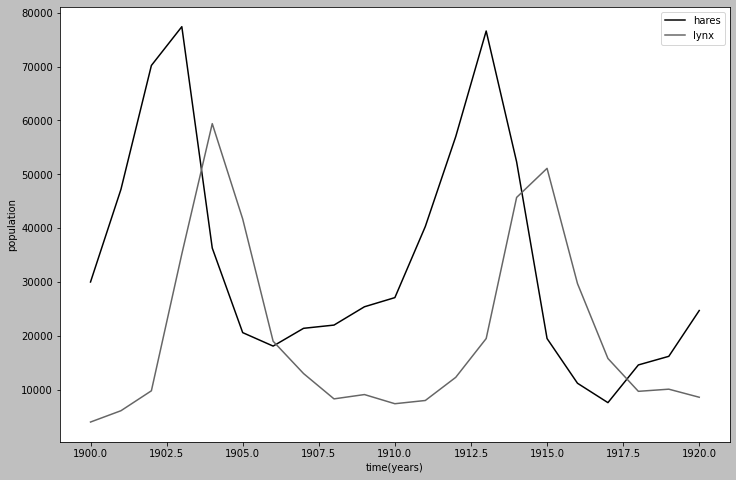

In [23]:
data = pd.DataFrame(data)

fig,ax=plt.subplots()
fig.set_size_inches(12, 8, forward=True)
plt.plot(data[0], data[1], label='hares')
plt.plot(data[0], data[2], label='lynx')
plt.ylabel('population')
plt.xlabel('time(years)')
plt.legend()
plt.show()

In [24]:
lynx_fourier = fftpack.fft(list(data[2]))
hares_fourier = fftpack.fft(list(data[1]))
lynx_pow = np.abs(lynx_fourier)
hares_pow = np.abs(hares_fourier)

0.09523809523809523
0.09523809523809523


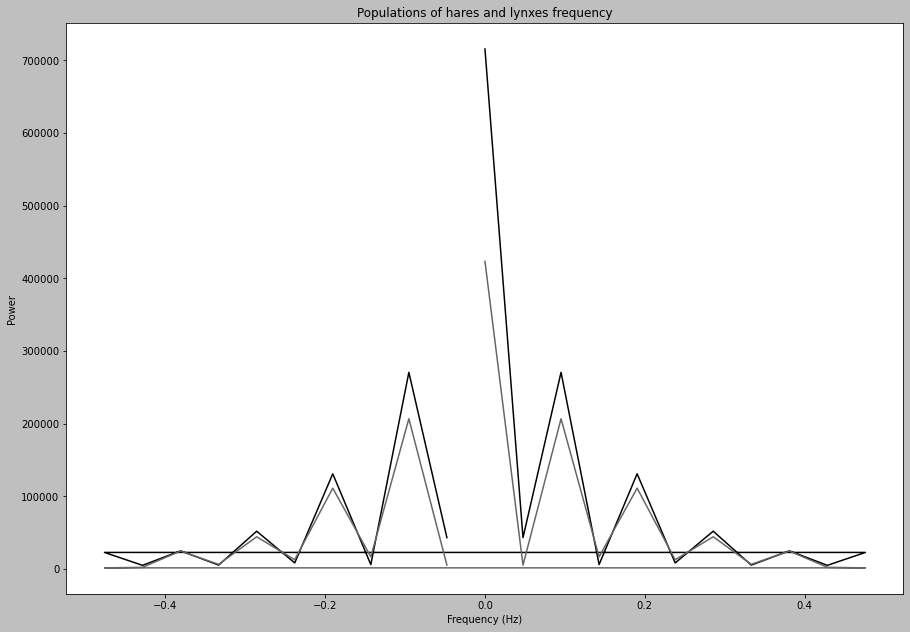

In [26]:
lynx_freq = fftpack.fftfreq(len(data[2]), d=np.abs(data[0][0]-data[0][1]))
hares_freq = fftpack.fftfreq(len(data[1]), d=np.abs(data[0][0]-data[0][1]))

fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(8, 6))
fig.set_size_inches(15, 10.5, forward=True)
ax.plot(hares_freq, hares_pow)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power')
max_index = np.argmax(hares_pow[1:])
freq_hares = hares_freq[1:][max_index]

ax.plot(lynx_freq, lynx_pow)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power')
ax.set_title('Populations of hares and lynxes frequency')
max_index = np.argmax(lynx_pow[1:])
freq_lynxes = lynx_freq[1:][max_index]
print(freq_lynxes)
print(freq_hares)

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

In [3]:
!pip3 install matplotlib

In [1]:
a = range(3)

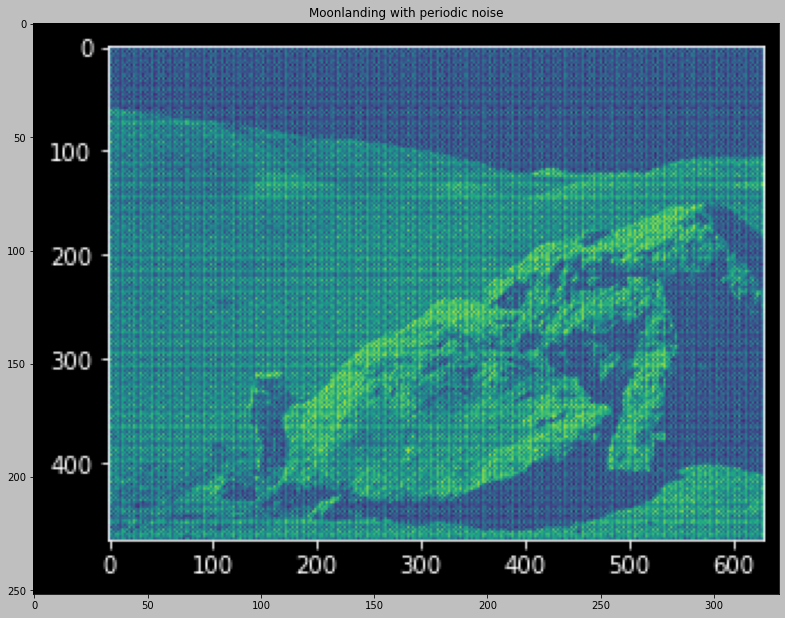

In [27]:
import matplotlib.pyplot as plt
image = plt.imread('/home/emersonvero/repo/LaboratoryOfComputationalPhysics_Y4/moonlanding.png')
fig,ax=plt.subplots()
fig.set_size_inches(15, 10.5, forward=True)
plt.imshow(image, cmap='gray')
plt.title("Moonlanding with periodic noise")
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


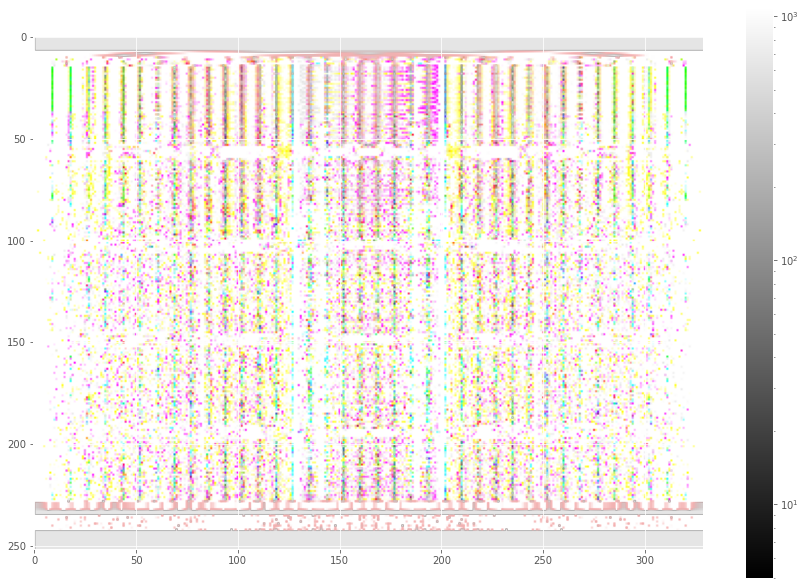

In [40]:
from matplotlib.colors import LogNorm
%matplotlib inline
moonlanding_fourier = fftpack.fft2(image)
fig,ax=plt.subplots()
fig.set_size_inches(15, 10.5, forward=True)
plt.style.use('ggplot')
plt.imshow(np.abs(moonlanding_fourier), norm=LogNorm(vmin=5, vmax=np.abs(moonlanding_fourier).max()))
plt.colorbar()


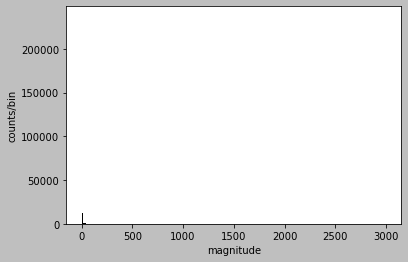

In [33]:
magnitudes = np.reshape(np.abs(moonlanding_fourier), (np.prod(moonlanding_fourier.shape)))
plt.hist(magnitudes, bins=1000, range=[0,3000])
plt.xlabel("magnitude")
plt.ylabel("counts/bin")
plt.show()



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


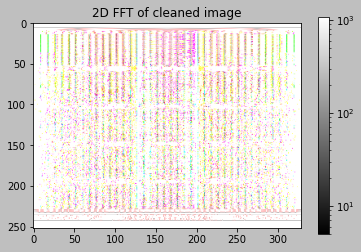

In [27]:


# Trying to cancel out higher magnitude regions
filtered_image_fft = moonlanding_fourier.copy()
filtered_image_fft[np.abs(moonlanding_fourier)>3000]=0
plt.imshow(np.abs(filtered_image_fft), norm=LogNorm(vmin=5, vmax=np.abs(moonlanding_fourier).max()))
plt.title("2D FFT of cleaned image")
plt.colorbar()
plt.show()



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


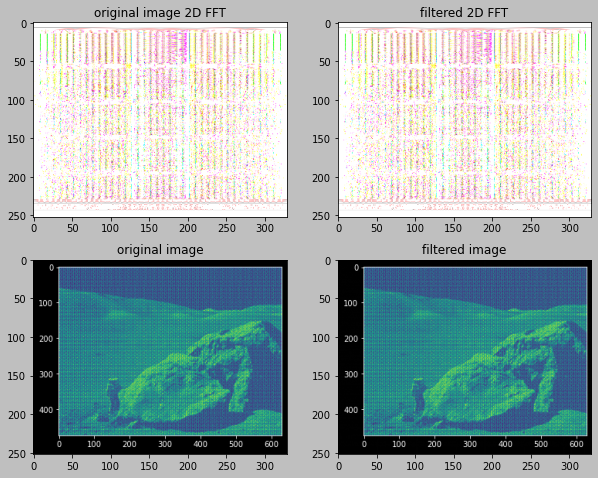

In [29]:

#inverse fourier
filtered_image = np.real(fftpack.ifft2(filtered_image_fft))

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax[0, 0].imshow(np.abs(moonlanding_fourier), norm=LogNorm(vmin=5, vmax=np.abs(moonlanding_fourier).max()))
ax[0, 0].set_title("original image 2D FFT")
ax[0, 1].imshow(np.abs(filtered_image_fft), norm=LogNorm(vmin=5, vmax=np.abs(moonlanding_fourier).max()))
ax[0, 1].set_title("filtered 2D FFT")
ax[1, 0].imshow(image, cmap='gray')
ax[1, 0].set_title("original image")
ax[1, 1].imshow(filtered_image, cmap='gray')
ax[1, 1].set_title("filtered image")
plt.show()

